# Jiu Yang (James) Wang

## Research question/interests

**My part of the project will be analyzing the correlation between housing prices and inventory shortfall as compared to population increases.**

My research question is looking at the correlation between housing prices and shortfall. Housing affordability is a pivotal issue for my generation, and i believe that the oft touted narrative of phantom overseas buyers is only a narrative meant to distract from the fact that the true cause of housing prices is a lack of new housing as compared to population. 

I plan to tackle my question by plotting housing price and invetory shortfall. I plan to calculate inventory shortfall by calculating the difference between population increases in regions and the amount of housing built. I will then present this to the reader by visualizing this data in graphs. I may also include the comparison to interest rates, and compare it to the shortfall plot. 

In [ ]:

import pandas as pd
import seaborn as sns
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib import dates as dates
import numpy as np



DailyInterestRate = pd.read_csv("../data/raw/DailyInterestRate.csv")
NewHousingPIndex = pd.read_csv("../data/raw/NewHousingPIndex.csv")
NewInventory = pd.read_csv("../data/raw/NewInventory.csv", low_memory = False)
#PopEstimate = pd.read_csv("../data/processed/PE_Wrangled_Final")
PopEstimate = pd.read_csv("../data/raw/PopEstimate.csv")
LPE = pd.read_csv("../data/processed/PE_ordered_filtered.csv")


In [ ]:
#Pruning for interest rate table

#Prunes out data from before 2001-01-01
#Also selects only the target target rate
DailyInterestRatePruned = DailyInterestRate[(DailyInterestRate["Financial market statistics"] == "Target rate") & (DailyInterestRate["REF_DATE"] > "2001-01-01")] 
DailyInterestRatePruned2 = DailyInterestRatePruned[['REF_DATE', 'VALUE']]
DailyInterestRatePruned3 = DailyInterestRatePruned2.dropna()
#DailyInterestRatePruned3.sample(30)
DailyInterestRatePruned3.to_csv("../data/processed/DailyInterestRatePruned.csv")


# EDA 1 ANALYSIS:
As can be seen in the above 2 graphs, due to the amount of data available, for display purposes, the yearly rates graph tracks close enough to the general shape of the daily interest rates. This means that while the actual analysis will be done with raw data, presentations can use monthly, or yearly data for simplicity. 

In [ ]:
abpopest = pd.read_csv("../data/processed/PopEstimate/Abbotsford - Mission (CMA),PopEstimate.csv")
abnewinv = pd.read_csv("../data/processed/NewInventory/Abbotsford-Mission,NewInventory.csv")

abnewinvyr = abnewinv.groupby(pd.PeriodIndex(abnewinv["REF_DATE"], freq="Y"))["VALUE"].sum().reset_index()
abpopest["Change"] = abpopest["VALUE"].diff()

shortfall = pd.DataFrame()
shortfall["Date"] = abpopest["REF_DATE"]
shortfall["0"] = (abnewinvyr["VALUE"]  * 0)
shortfall["1.5"] =  (abpopest["Change"] - (abnewinvyr["VALUE"]  * 1.5))
shortfall["2.5"] =  (abpopest["Change"] - (abnewinvyr["VALUE"]  * 2.5))
shortfall["3.5"] =  (abpopest["Change"] - (abnewinvyr["VALUE"]  * 3.5))
shortfall["4.5"] =  (abpopest["Change"] - (abnewinvyr["VALUE"]  * 4.5))


shortfallgraph = sns.lineplot(x='Date', y='value', hue='variable', 
             data=pd.melt(shortfall, ['Date']))
shortfallgraph.set(xlabel = "Date",
        ylabel = "Shortfall",
        title = "Housing shortfall in Abottsford mission assuming 1.5 persons per home"
        )



# EDA 2 ANALYSIS:

This is a test illustration for calculating shortfall for a region, this graph shows that the data is as expected, and that processing has gone right to wrangle it into what i want it to do. In this graph, we see that varying assumptions for how many people on average live in a home affect whether there is a shortfall or not, and that housing must support at least an average of 2.5 people to be able to maintain a relatively neutral inventory. 

In [ ]:
calindex = pd.read_csv("../data/processed/PIndex/Calgary,PIndex.csv")
calpopest = pd.read_csv("../data/processed/PopEstimate/Calgary (CMA),PopEstimate.csv")
calnewinv = pd.read_csv("../data/processed/NewInventory/Calgary,NewInventory.csv")

calnewinvyr = calnewinv.groupby(pd.PeriodIndex(calnewinv["REF_DATE"], freq="Y"))["VALUE"].sum().reset_index()
calindex = calindex.groupby(pd.PeriodIndex(calnewinv["REF_DATE"], freq="Y"))["VALUE"].mean().reset_index()
calpopest["Change"] = calpopest["VALUE"].diff()
calindex["PDelta"] = calindex["VALUE"].diff()

shortfall = pd.DataFrame()
shortfall["PDelta"] = calindex["PDelta"] * 1000
shortfall["Date"] = calpopest["REF_DATE"]
shortfall["0"] = (calnewinvyr["VALUE"]  * 0)
shortfall["1.5"] =  (calpopest["Change"] - (calnewinvyr["VALUE"]  * 1.5))
shortfall["2.5"] =  (calpopest["Change"] - (calnewinvyr["VALUE"]  * 2.5))
shortfall["3.5"] =  (calpopest["Change"] - (calnewinvyr["VALUE"]  * 3.5))
shortfall["4.5"] =  (calpopest["Change"] - (calnewinvyr["VALUE"]  * 4.5))

shortfallgraph = sns.lineplot(x='Date', y='value', hue='variable', 
             data=pd.melt(shortfall, ['Date']))
shortfallgraph.set(xlabel = "Date",
        ylabel = "Shortfall",
        title = "Housing shortfall in Abottsford mission assuming x persons per home"
        )

# EDA 3 ANALYSIS:
this preliminary analysis seems to suggest that price indices jump following a shortfall. We see this in all shortfall except the one for 2008. My later analysis will focus on to what extent this pattern is reproduced in other regions, how significant it is, and also if its more relevant than other possible factors. 

# PM4 analysis

Having built my functions, i can now commence my analysis


In [8]:
from jamespf import CityProcess
from jamespf import trimmer
from jamespf import graph
from jamespf import scgraph
from jamespf import pcgraph

City process makes the master dataframe, converting the base datasets into one with all the data i want. Trimmer then removes any NAs and also renames the columns for easier handling. The graph function automagically draws my graphs with different variables so i can call it for an analysis.  

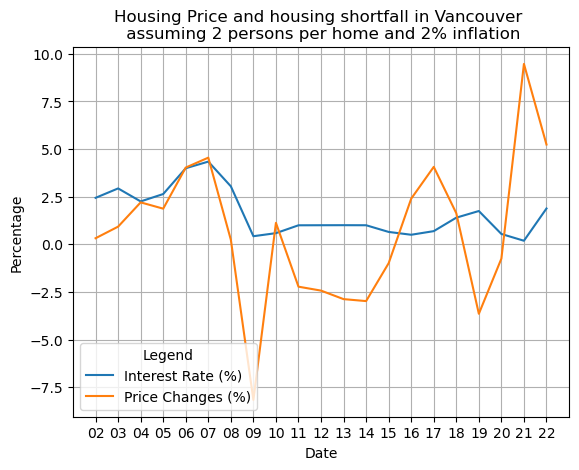

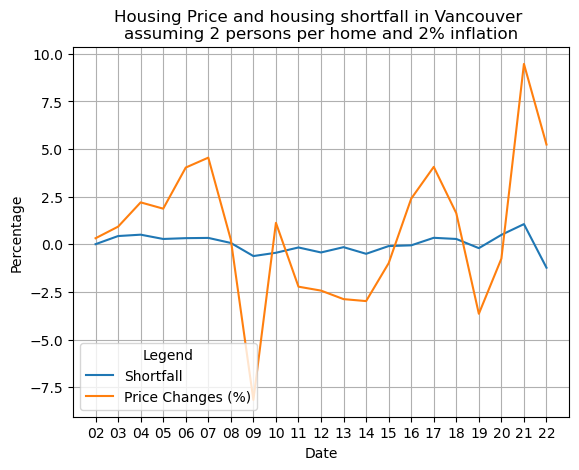

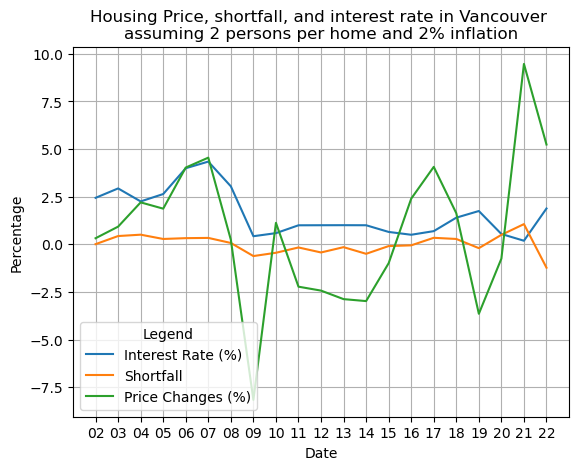

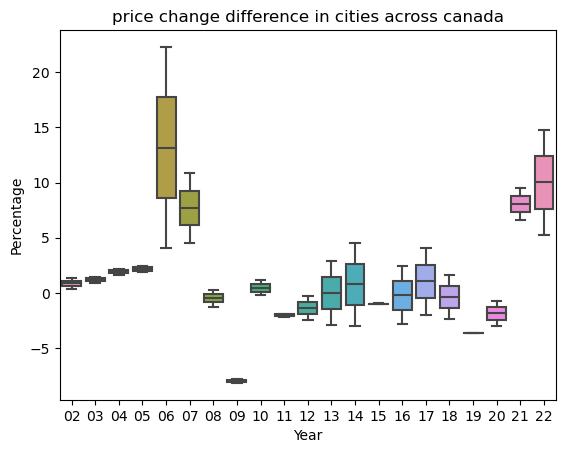

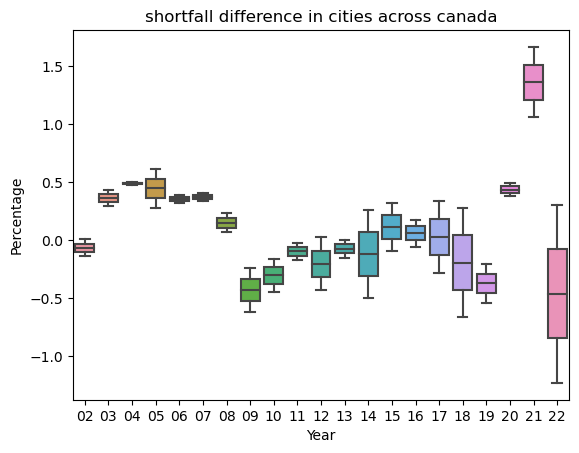

In [3]:
city = "Vancouver"
occ = 2
df = CityProcess(city, occ) 
df = trimmer(df)
VAintg = graph(df, city, occ,"int")
VAshortg = graph(df, city, occ,"shortfall")
VAg = graph(df, city, occ,"")



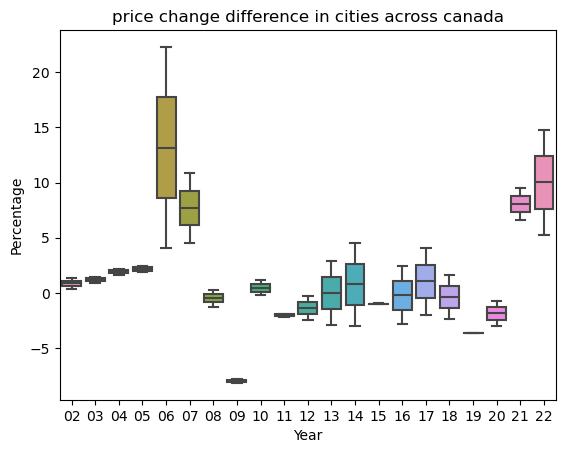

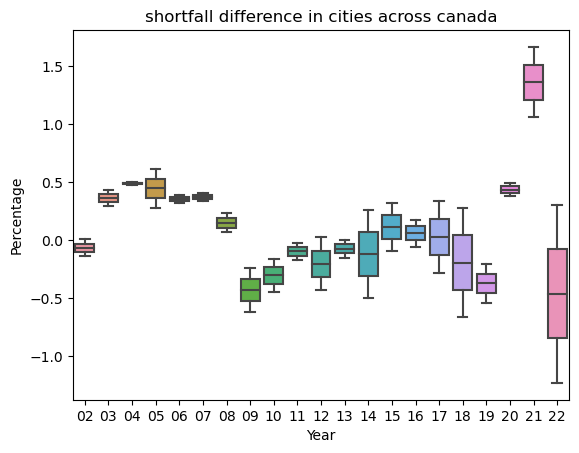

In [9]:
pcgraph1 = pcgraph()
scgraph1 = scgraph()

# Research question answer

## Data choices
I used 2 person/home as a metric because much of the construction in large cities has been in condo buildings, and the data unfortunately does not capture the types of dwellings built. In this analysis, i will be primarily looking at each city individually (and will set up my tableau dashboard to contain) graphs of price change and interest rates as well as price change and shortfall for each city individually. However, since the format of this notebook isn't particular conducive to that, i will use vancouver as i feel its the most representative. Another limitation is that the data we have only captures the indices for new construction. Unfortunately, we could not use BCAssessment property values or sales data as those have controlled access, and cannot be freely used. Finally, i have adjusted the pricing data with a 2% discount. This is to transform the price changes to changes in real terms. I feel this is important as since the data covers 22 years, infaltion will definitely play a role in how high the prices seem. 


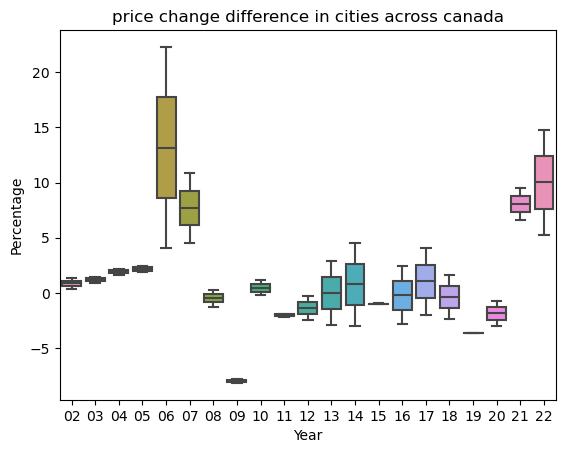

In [11]:
pcgraph1.get_figure()

# Canada price distribution
From this we can see that the distribution for the price changes in canadian cities are all fairly tight, except for 06-07, and 07-08. This is repeated again in 21-22. These spreads indicate that cities differ greately in how fast their new prices change. The 06-07 rises are also a sanity check for the correctness of data, as we know that in the run up to the 08 financial crisis, new housing was being built with great vigour. 

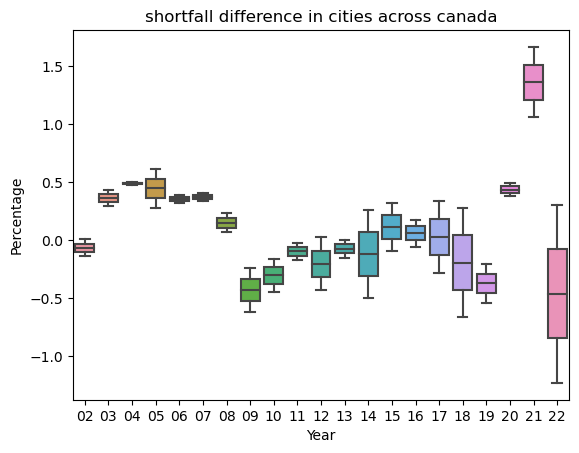

In [10]:
scgraph1.get_figure()

# Canada shortfall distribution 

The shortfall distribution shown is interesting in that it seems much more clustered together. However, there is still significant spread amongst the cities, especially in 21-22. Interestingly, the patters before ~2015 are fairly tight, indicating that major canadian cities didn't differ quite a lot in how much shortfall there was in housing. Also interestgly is that we can see that overvall in canada, the high shortfall years (03-07) and 21 were followed by years of high price changes. This seems to back up my theory that price increases are cause by housing shortfalls rather than by any speculative activity.

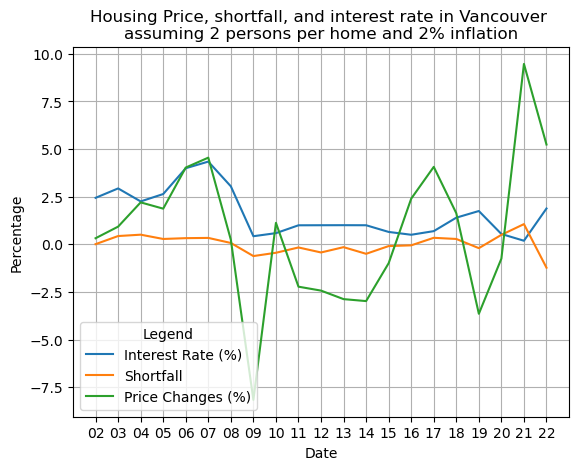

In [15]:
VAg

# Vancouver as a case study
Looking at vancouver as a representation of a big city, we can see that the price swings fairly dramatically. The two competing hypothesis that i would like to examine are that price changes are caused by speculation, or that price changes are caused by inventory shortfall. For the speculation hypothesis, we would expect to see that the price should move inversely (either simultaneously or with a small delay) compared to the interest rate. This is due to the fact that lower interest rates increase the availability of money, and thus encourage speculative bubbles. On this graph, we see that there is a shortfall from 02 to 08. During this period, the housing price is rising steadily. starting from 09 to 16, there is no shortfall, and the price (with the exception of what was likely a recovering in prices at 2010) is dropping. Following the return to neutrality then to shortfall in 2015, we again see rises in prices, followed by a drop in 2019. The most dramatic shortfall is in 2021, and simultaneously observe a equally dramatic rise in prices. To head off the argument that shortfalls are caused by lots of people buying a house then causing there to appear to not be enough housing, that should manifest differently on the graph. In that case, the shortfall should follow the movement in price, whereas here we observe shortfalls ahead of or simultaneous with price changes. 

I feel that through my visualizations, i can somewhat confidently say that i have provided some support for my hypothesis that shortfalls are more likely responsible for price changes as opposed to the idea that speculation drives up housing price. Though i didn't get to do the stastical analysis to scientifically prove my point, i think my graphs have somewhat helped illustrate my idea. 